In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [17]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [31]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    #print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[163.22523269 197.72077299 120.58292219]
 [107.68180177  95.55200125  71.59172666]]
[[183.98466124 182.78160298 164.96739564]
 [ 58.37428583  55.19630403  46.14141613]
 [160.6551544  204.76127013 114.71480327]
 [143.94710593 128.31528126  97.22833353]]
[[114.44696957  98.71545213  67.15675256]
 [163.46379369 211.87247166 117.70727425]
 [170.22608184 164.46317924 142.66412558]
 [148.87097317 133.27674331 103.51519709]
 [ 37.94689044  40.25858313  40.91019544]
 [198.65055854 199.73279989 187.48994179]
 [154.66152163 192.87064369 110.87392516]
 [220.14300101 190.60641155  36.89207788]]
[[157.10567057 192.91932956 112.14696095]
 [ 26.41783851  27.45968474  26.03277387]
 [166.74208943 113.32441125  56.05539994]
 [187.95893835 187.63062366 176.77184004]
 [215.25896334 214.86444206 208.08540352]
 [118.1720942  106.47444923  75.94011142]
 [159.76584536 145.83254426 118.30480445]
 [164.83039753 214.00287637 118.74528299]
 [227.75182634 201.58108954  36.80025047]
 [ 94.82169633  77.95771918  46

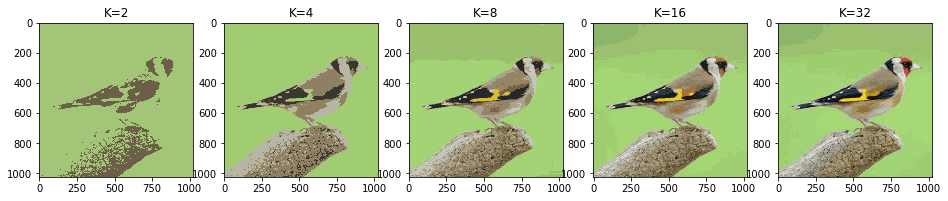

In [30]:
h, w, c = img.shape
#print(img)
Z = img.reshape((-1,3))
Ka= [2,4,8,16,32]
plt.figure(figsize=(16,32))

for i,K in enumerate(Ka):
    label, center = km_clust(Z,K)
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1)
    plt.title("K={}".format(K))
    plt.imshow(res)

## 1-2. cluster with RGB values and the location

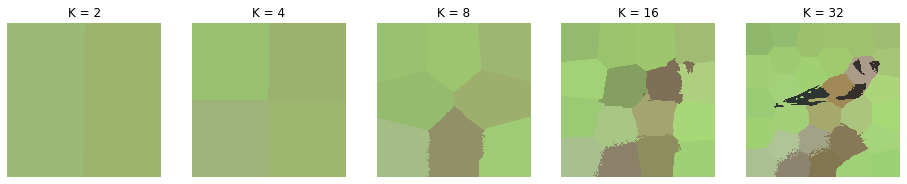

In [32]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

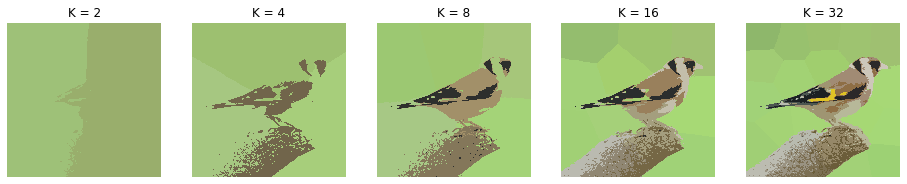

In [33]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,4,8,16,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()